<a href="https://colab.research.google.com/github/trishashukla1021/afame-technologies/blob/main/customer_churn_prediction_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)


In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop("RowNumber",axis=1,inplace=True)
df.drop("Surname",axis=1,inplace=True)

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [9]:
churn = df[['CustomerId','Exited']]
churn = churn.rename(columns={'Exited': 'churn'})
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

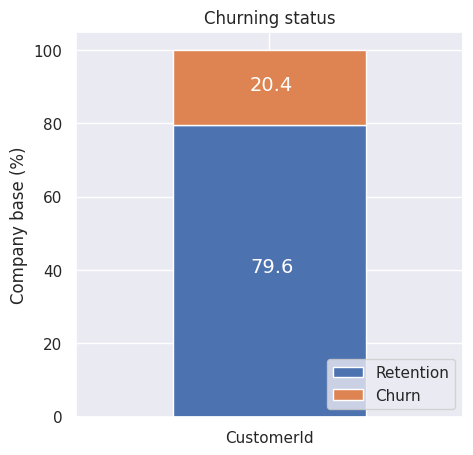

In [10]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [11]:
tenure = df[['CustomerId', 'Tenure', 'Exited']]
tenure = tenure.groupby(['Tenure', 'Exited'])['CustomerId'].count().unstack(level=1,fill_value=0)
tenure_churn = (tenure.div(tenure.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

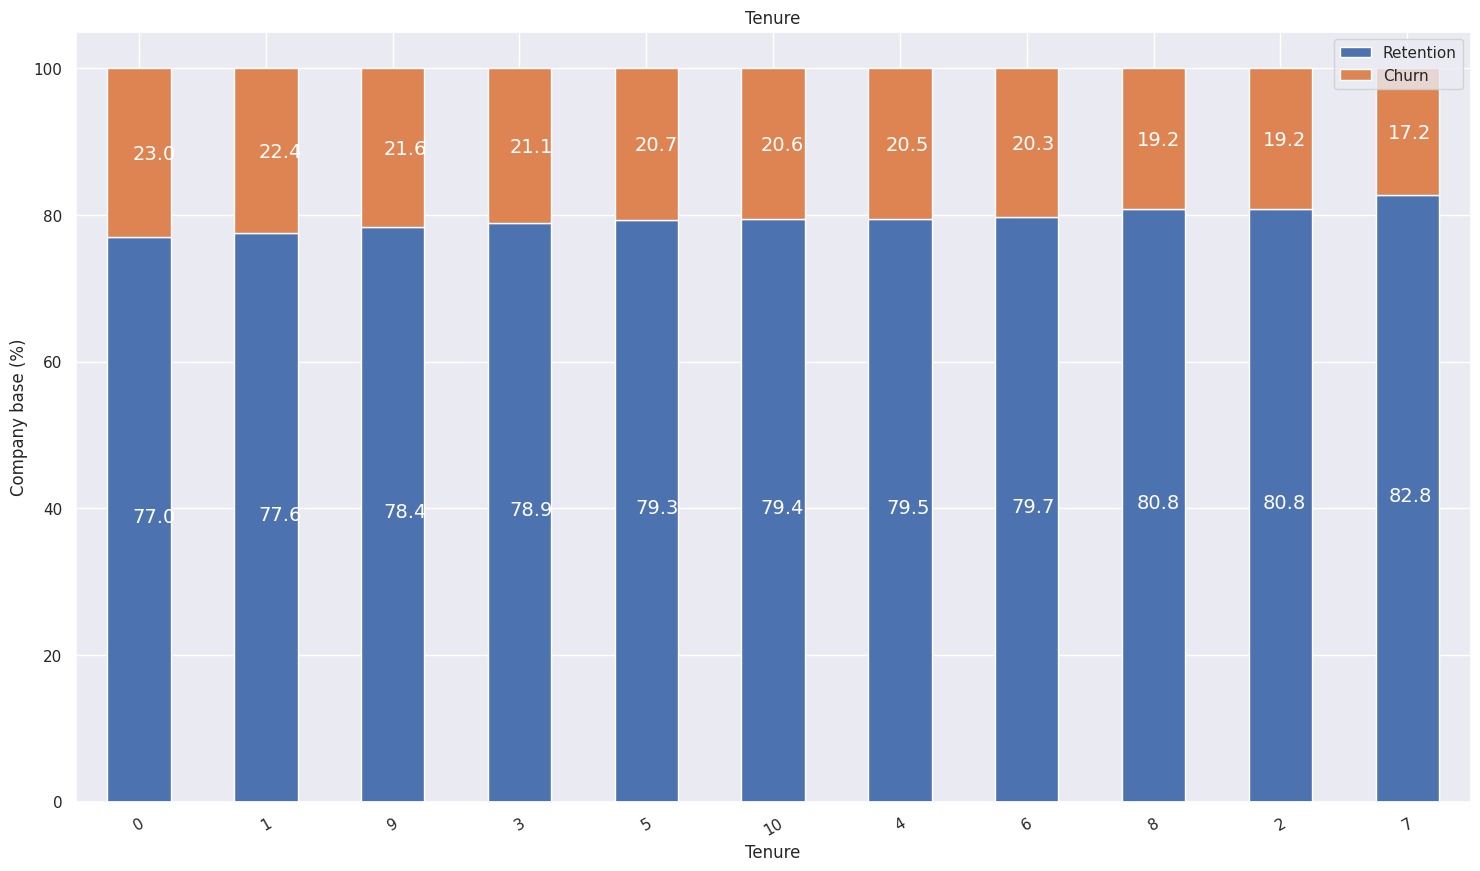

In [12]:
plot_stacked_bars(tenure_churn, 'Tenure', rot_=30)

Text(0.5, 1.0, 'Countplot-Geography Column')

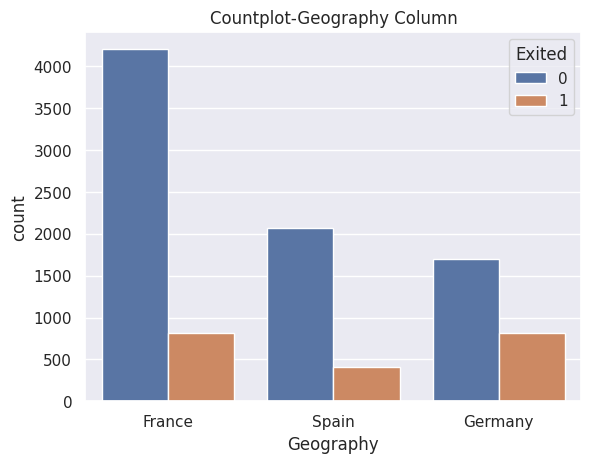

In [13]:
sns.countplot(x='Geography', hue = 'Exited',data = df).set_title('Countplot-Geography Column')

In [14]:
products = df[['CustomerId', 'NumOfProducts', 'Exited']]
products = products.groupby([products['Exited'], products['NumOfProducts']])['CustomerId'].count().unstack(level=0)
products_percentage = (products.div(products.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

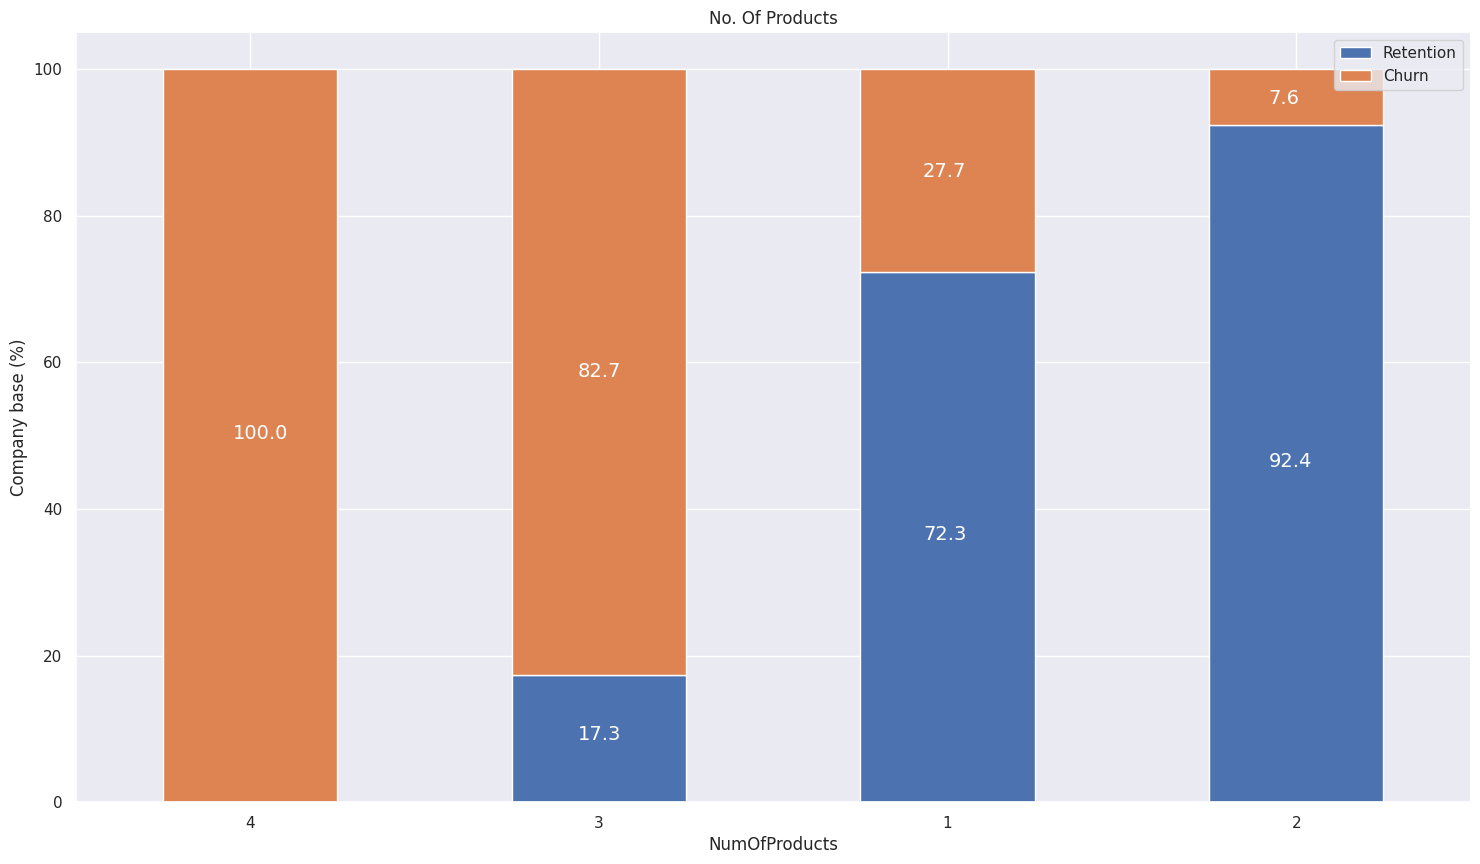

In [15]:
plot_stacked_bars(products_percentage, 'No. Of Products')

In [16]:
card = df[['CustomerId', 'HasCrCard', 'Exited']]
card = card.groupby([card['Exited'], card['HasCrCard']])['CustomerId'].count().unstack(level=0)
card_percentage = (card.div(card.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

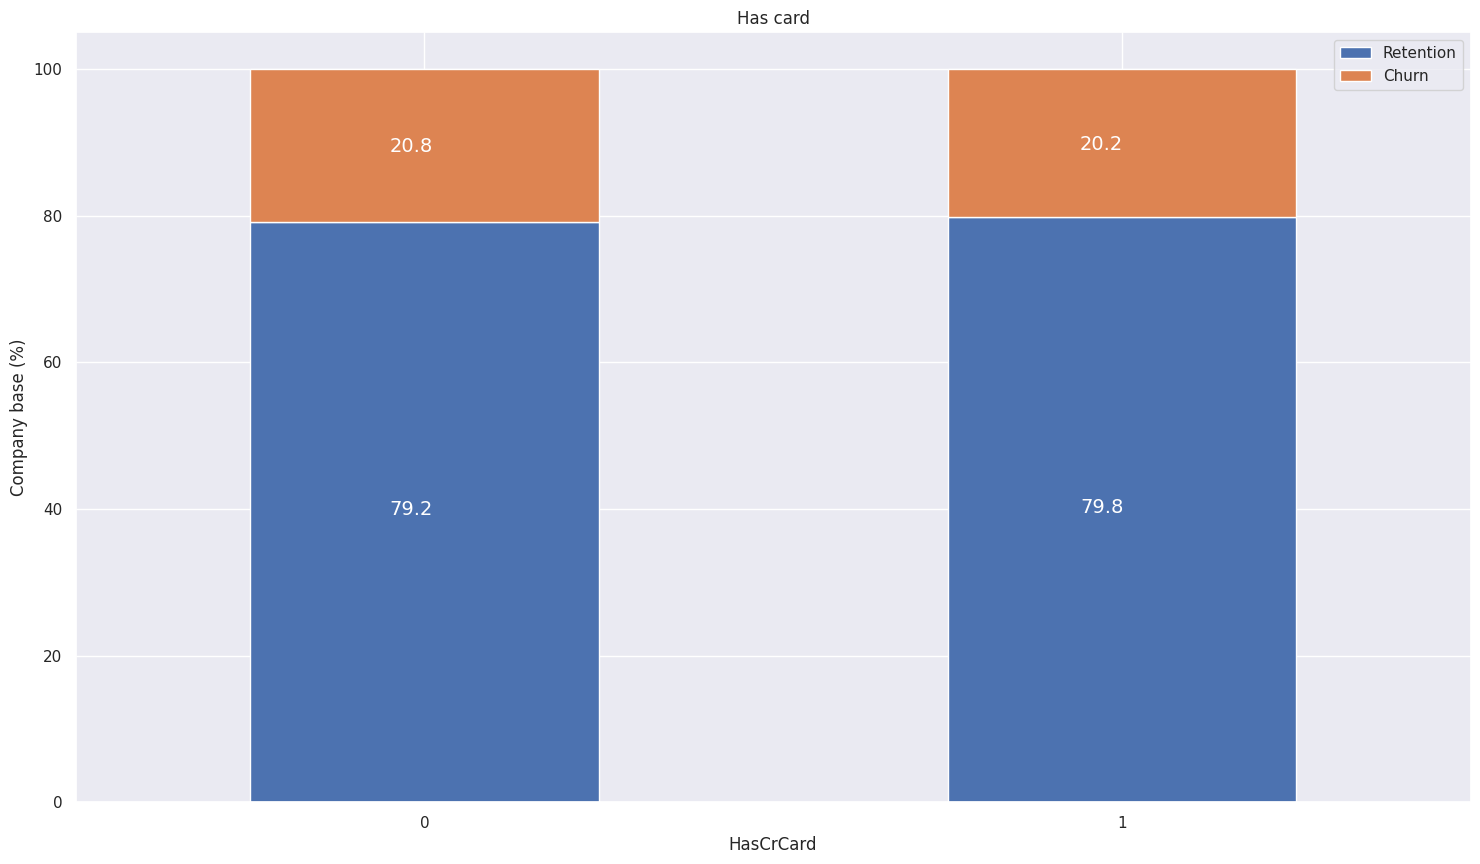

In [17]:
plot_stacked_bars(card_percentage, 'Has card')

In [18]:
active= df[['CustomerId', 'IsActiveMember', 'Exited']]
active= active.groupby([active['Exited'], active['IsActiveMember']])['CustomerId'].count().unstack(level=0)
active_percentage = (active.div(active.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

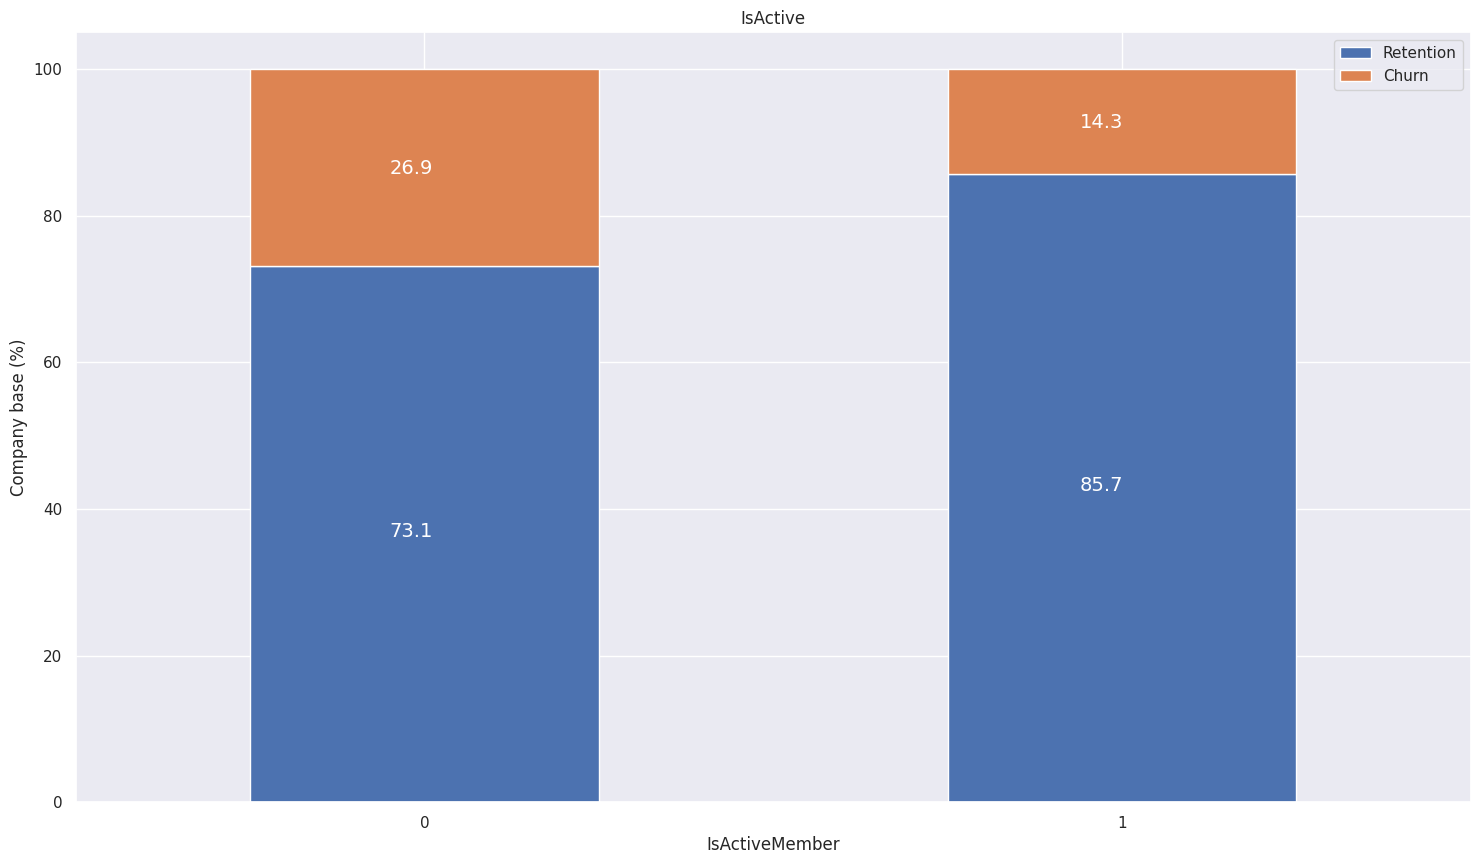

In [19]:
plot_stacked_bars(active_percentage, 'IsActive')

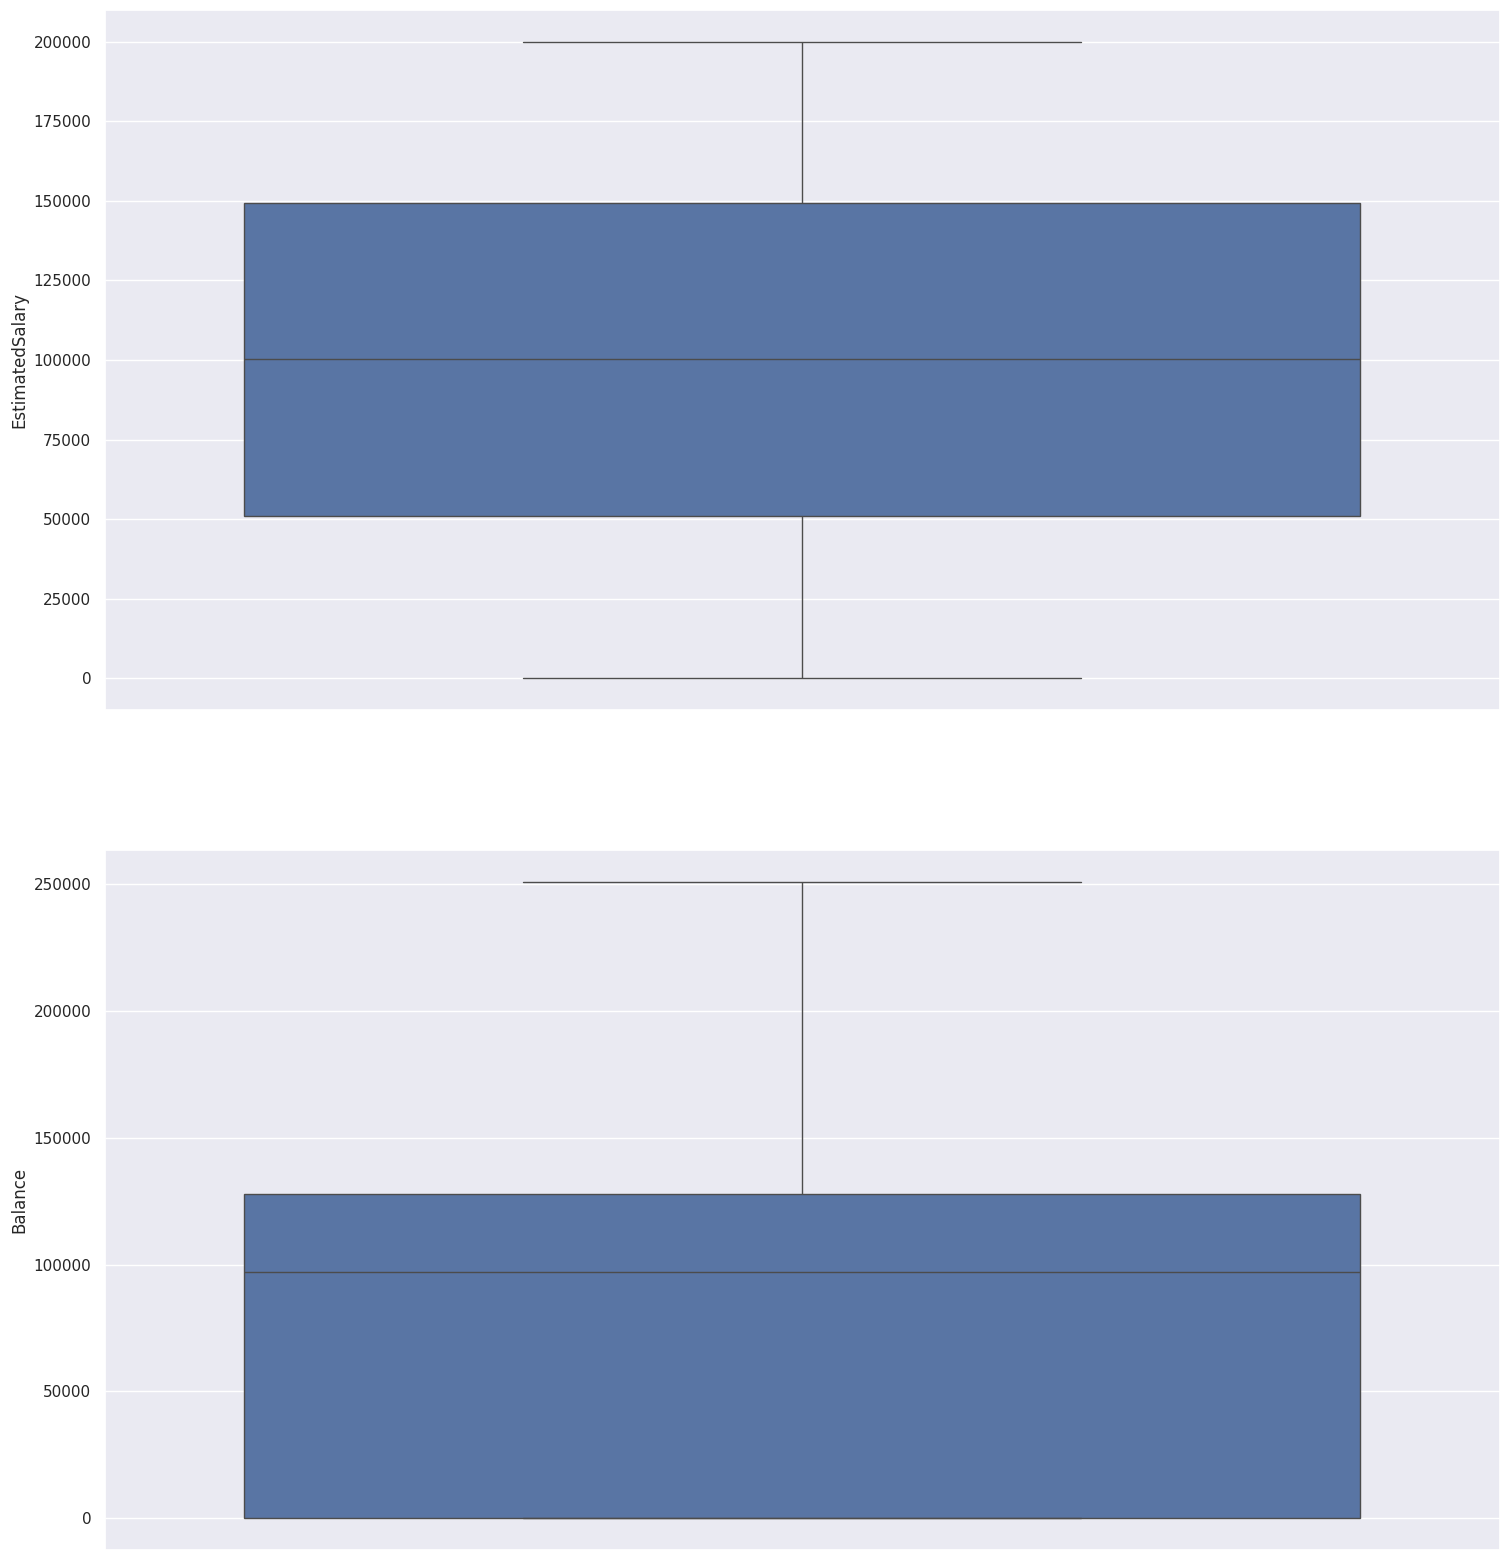

In [20]:
fig, axs = plt.subplots(nrows=2, figsize=(18,20))
# Plot histogram
sns.boxplot(df["EstimatedSalary"], ax=axs[0])
sns.boxplot(df["Balance"],ax=axs[1])
plt.show()

In [21]:
df['Geography'] = df['Geography'].replace(['Germany'],'0')
df['Geography'] = df['Geography'].replace(['France'],'1')
df['Geography'] = df['Geography'].replace(['Spain'],'2')
#Change value in gender column
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df['Geography'] = pd.to_numeric(df['Geography'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

CustomerId           int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [30]:
#Remove customer_id column
df = df.drop('CustomerId', axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

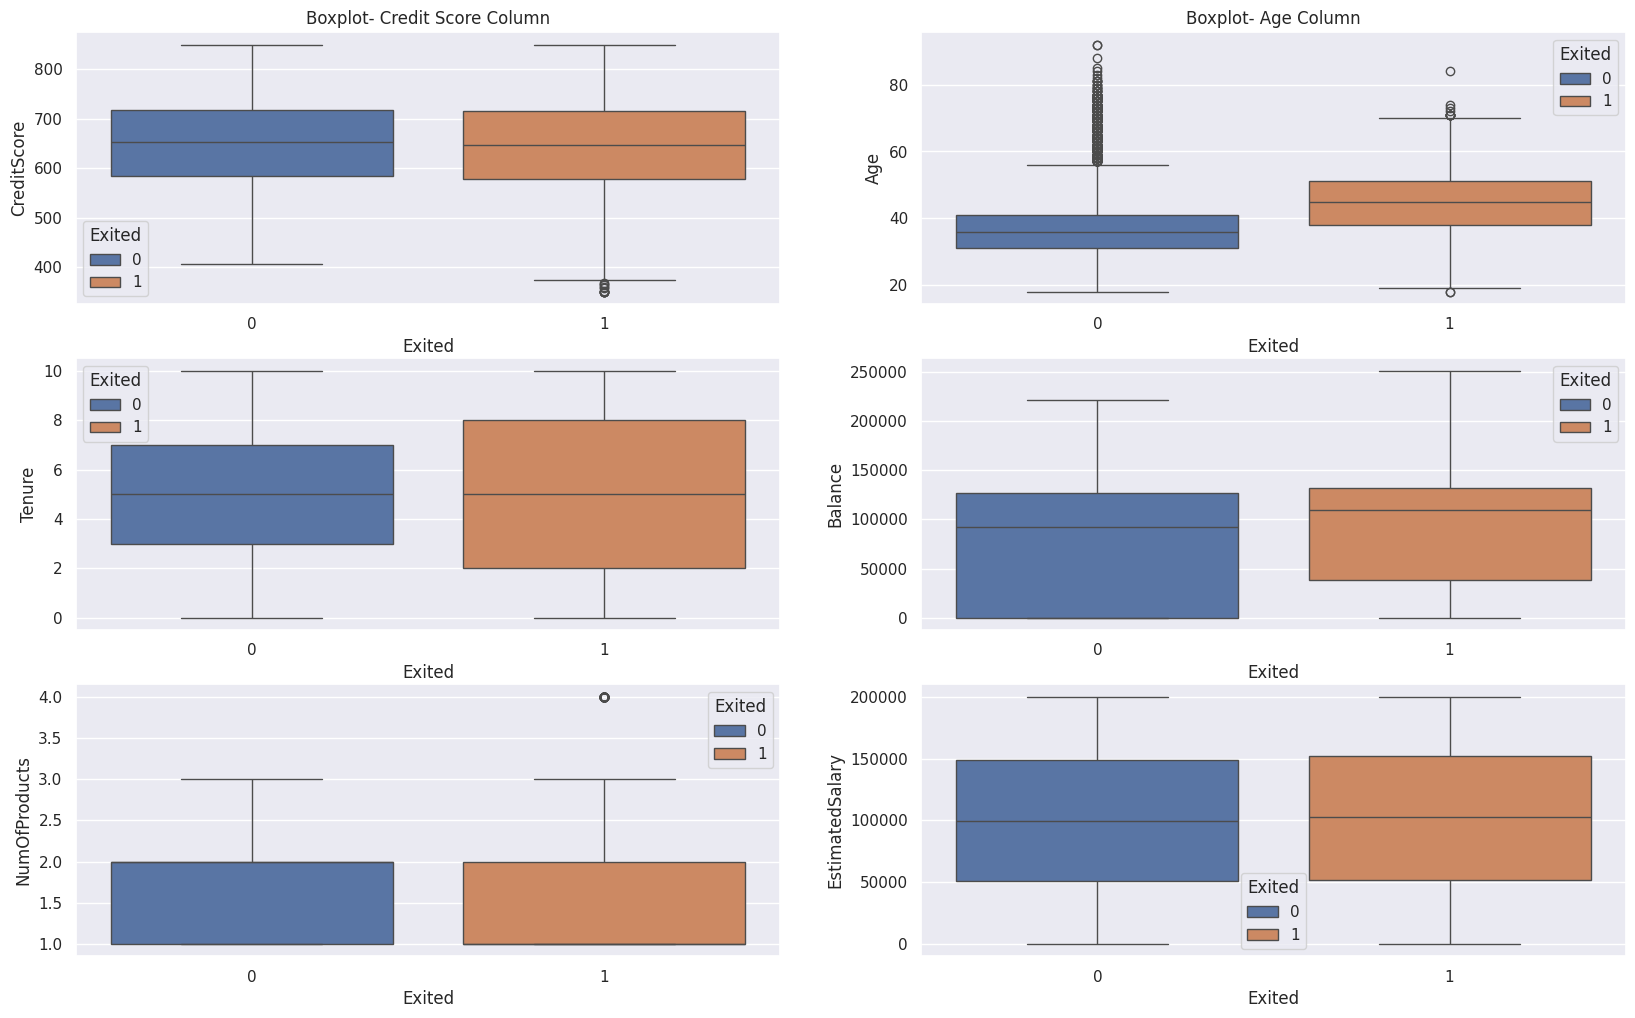

In [24]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0]).set_title('Boxplot- Credit Score Column')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1]).set_title('Boxplot- Age Column')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

(-1.0, 5.0)

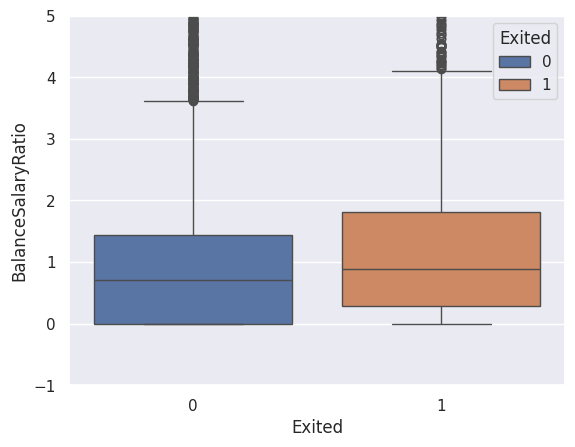

In [25]:
# 1st Attribute - Balance Salary Ratio
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

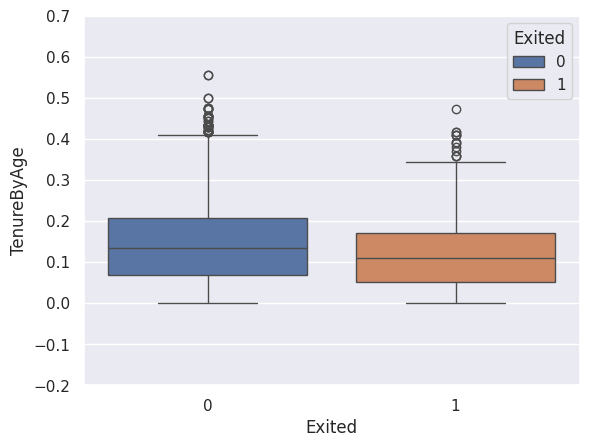

In [26]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-0.2, 0.7)
plt.show()

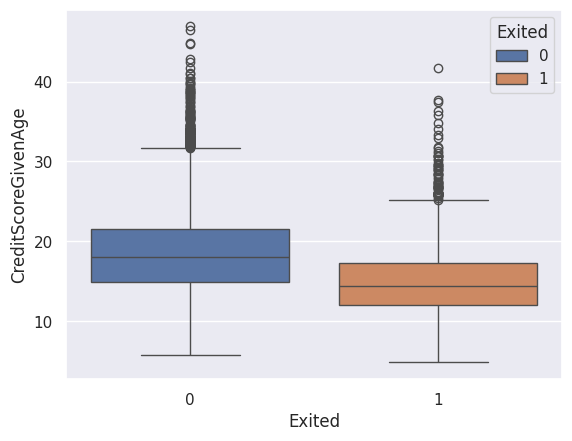

In [27]:
# 3rd Attribute- Credit Score Given Age
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df)
plt.show()

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [32]:
df.shape

(10000, 14)

In [33]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + categorical_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,1,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,1,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


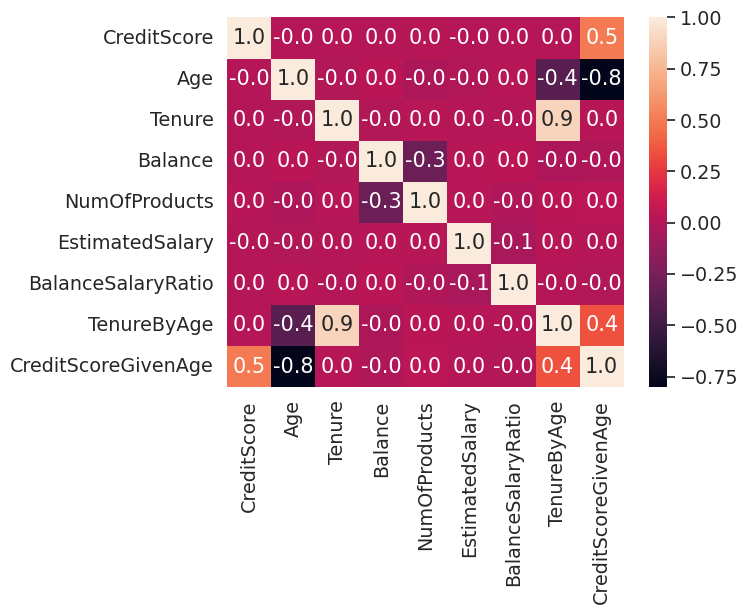

In [34]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df[continuous_vars].corr(), annot = True,fmt = ".1f")
plt.show()

In [35]:
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


In [36]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df1.columns

Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Gender_0',
       'Gender_1', 'Geography_0', 'Geography_1', 'Geography_2'],
      dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])


In [38]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [40]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
features_label = X_train.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.161926
 2) Age                            0.126787
 3) Tenure                         0.125725
 4) Balance                        0.092164
 5) NumOfProducts                  0.090103
 6) EstimatedSalary                0.089425
 7) BalanceSalaryRatio             0.078526
 8) TenureByAge                    0.074407
 9) CreditScoreGivenAge            0.044337
10) HasCrCard                      0.040609
11) IsActiveMember                 0.021499
12) Gender_0                       0.013698
13) Gender_1                       0.010581
14) Geography_0                    0.010503
15) Geography_1                    0.010313
16) Geography_2                    0.009396
